In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Метод прогонки

In [4]:
from tridiagonal_matrix_algorithm import tridiagonal_matrix_algorithm

## Метод ДОПИСАТЬ

In [10]:
from get_solution_const_k import get_solution

## Вычисление погрешности

In [20]:
def get_error(g1, g2, f, apply_boundary_conditions, n, x_left, x_right) -> float:
    u_h, _ = get_solution(
        g1=g1,
        g2=g2,
        f=f,
        apply_boundary_conditions=apply_boundary_conditions,
        n=n,
        x_left=x_left,
        x_right=x_right
    )

    u_2h, _ = get_solution(
        g1=g1,
        g2=g2,
        f=f,
        apply_boundary_conditions=apply_boundary_conditions,
        n=n * 2,
        x_left=x_left,
        x_right=x_right
    )

    return (u_h - u_2h[::2]) / 3

In [42]:
def get_solution_and_error(g1, g2, f, apply_boundary_conditions, n, x_left, x_right):
    error = get_error(g1, g2, f, apply_boundary_conditions, n, x_left, x_right)
    u, x = get_solution(
        g1=g1,
        g2=g2,
        f=f,
        apply_boundary_conditions=apply_boundary_conditions,
        n=n,
        x_left=x_left,
        x_right=x_right
    )
    return u, x, np.max(np.abs(error))

## Тестовая задача
$u''(x) = -\pi^2 \sin(\pi x), u(0) = 0, u(1) = 0$

In [43]:
x_left = 0
x_right = 2
n = 200

def apply_boundary_conditions(a, b, c, d, h):
    d[0] = 0
    d[-1] = 0


u, x, error = get_solution_and_error(
    g1=lambda x: 0,
    g2=lambda x: 0,
    f=lambda x: -np.pi ** 2 * np.sin(np.pi * x),
    apply_boundary_conditions=apply_boundary_conditions,
    n=n,
    x_left=x_left,
    x_right=x_right
)

u_exact = np.sin(np.pi * x)

print(f'{error = }')

error = np.float64(0.005196187983476083)


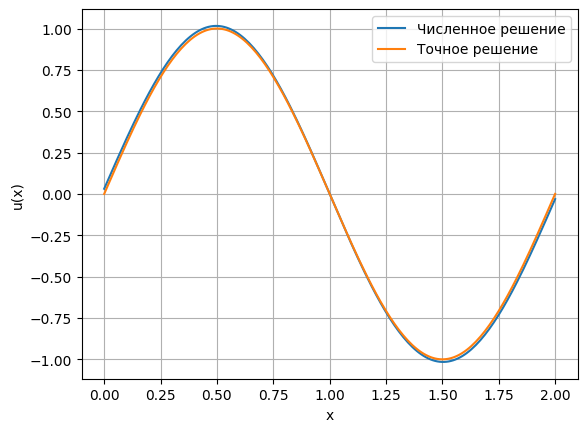

In [44]:
plt.plot(x, u, label="Численное решение")
plt.plot(x, u_exact, label="Точное решение")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

## Основная задача

In [49]:
x_left = 1.2
x_right = 2.2
n = 100


def apply_boundary_conditions(a, b, c, d, h):
    # u(1.2) - 0.2 * u'(1.2) = 0.2
    a[0] = None  # не используется в расчетах
    b[0] = -0.4 / h
    c[0] = 0.1 / h
    d[0] = 0.2

    #  u'(2.2) = 4
    a[-1] = 1 / (2 * h)
    b[-1] = -4 / (2 * h)
    c[-1] = None  # не используется в расчетах
    d[-1] = 4


u, x, error = get_solution_and_error(
    g1=lambda x: -x,
    g2=lambda x: 2 * x,
    f=lambda x: np.full(len(x), 2.8),
    apply_boundary_conditions=apply_boundary_conditions,
    n=n,
    x_left=x_left,
    x_right=x_right
)

print(f'{error = }')

error = np.float64(0.005744835158515649)


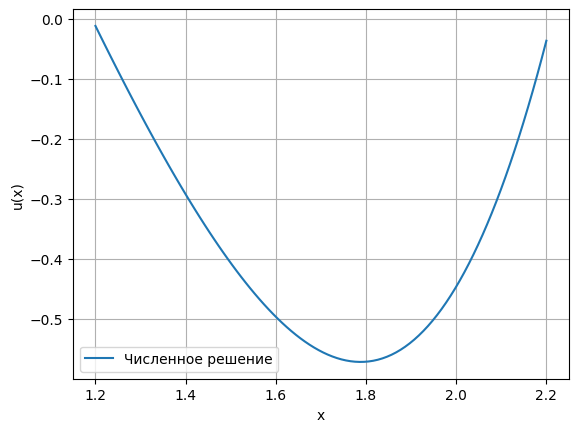

In [50]:
plt.plot(x, u, label="Численное решение")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()